# AGN variability

Adapted the contents of this notebook from "extragalactic_fields/science_with_candidates/01_demo_candidates.ipynb".

Recall:
 * "object" refers to a single detection in a difference image
 * "candidate" refers to associated detections at a given sky location
 * "probably-real" candidates means >10 detections, mean R/B>0.6
   * cuts shown to be reasonable in `extragalactic_fields/source_detection_summary_figures.ipynb`
   * cuts also discussed in Section 3 of Graham et al. (in prep)

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import brokenaxes as brokenaxes
from brokenaxes import brokenaxes

## 1. Read DDF data files

All of the data files have headers explaining when they were created, by which code, and what the columns are.

This notebooks is reading in all of the data files, but not necessarily using them all.

### Exposures

Information about the exposures obtained for the extragalactic fields, COSMOS and ELAIS.

Columns which are mean values are the average over all subtractions, or in other words all CCDs, of the exposure.

 * `field` = field, COSMOS or ELAIS
 * `cal` = calendar date
 * `fbs` = filename base
 * `id` = exposure identifier
 * `mjd` = modified julian date
 * `filter` = filter
 * `mlmg` = mean limiting magnitude (mag)
 * `msee` = mean seeing (arcsec)
 * `msks` = mean sky background (counts)
 * `tnobj` = number of objects
 * `tnobjg` = number of objects with R/B score > 0.6 

In [3]:
fnm = '../../extragalactic_fields/source_detection_summary_files/exposures.dat'
exp_field  = np.loadtxt(fnm, dtype='str',   usecols=(0))
exp_cal    = np.loadtxt(fnm, dtype='str',   usecols=(1))
exp_fbs    = np.loadtxt(fnm, dtype='str',   usecols=(2))
exp_id     = np.loadtxt(fnm, dtype='int',   usecols=(3))
exp_mjd    = np.loadtxt(fnm, dtype='float', usecols=(4))
exp_filter = np.loadtxt(fnm, dtype='str',   usecols=(5))
exp_mlmg   = np.loadtxt(fnm, dtype='float', usecols=(6))
exp_msee   = np.loadtxt(fnm, dtype='float', usecols=(7))
exp_msks   = np.loadtxt(fnm, dtype='float', usecols=(8))
exp_tnobj  = np.loadtxt(fnm, dtype='int',   usecols=(9))
exp_tnobjg = np.loadtxt(fnm, dtype='int',   usecols=(10))
del fnm

In [4]:
print(len(exp_field))

2268


### Candidates

This file only contains "probably-real" candidates, which had >10 detections and a mean R/B>0.4.

Recall that 'object' means 'detection in a single difference image'.

 * `field`    = field, COSMOS or ELAIS
 * `id`       = candidate identifier
 * `ra`       = right ascension (deg)
 * `dec`      = declination (deg)
 * `cobj`     = number of objects
 * `meanrb`   = mean R/B score of objects
 * `stdrb`    = standard deviation of R/B score of objects
 * `tspan`    = time span between first and last object (days)
 * `amp`      = amplitude between brightest and faintest object (mag)

In [5]:
fnm = '../../extragalactic_fields/source_detection_summary_files/candidates.dat'
cand_field    = np.loadtxt(fnm, dtype='str',   usecols=(0))
cand_id       = np.loadtxt(fnm, dtype='str',   usecols=(1))
cand_ra       = np.loadtxt(fnm, dtype='float', usecols=(2))
cand_dec      = np.loadtxt(fnm, dtype='float', usecols=(3))
cand_cobj     = np.loadtxt(fnm, dtype='int',   usecols=(4))
cand_meanrb   = np.loadtxt(fnm, dtype='float', usecols=(5))
cand_stdrb    = np.loadtxt(fnm, dtype='float', usecols=(6))
cand_tspan    = np.loadtxt(fnm, dtype='float', usecols=(7))
cand_amp      = np.loadtxt(fnm, dtype='float', usecols=(8))
cand_cobj_g   = np.loadtxt(fnm, dtype='int',   usecols=(9))
cand_meanrb_g = np.loadtxt(fnm, dtype='float', usecols=(10))
cand_stdrb_g  = np.loadtxt(fnm, dtype='float', usecols=(11))
cand_tspan_g  = np.loadtxt(fnm, dtype='float', usecols=(12))
cand_amp_g    = np.loadtxt(fnm, dtype='float', usecols=(13))
cand_cobj_r   = np.loadtxt(fnm, dtype='int',   usecols=(14))
cand_meanrb_r = np.loadtxt(fnm, dtype='float', usecols=(15))
cand_stdrb_r  = np.loadtxt(fnm, dtype='float', usecols=(16))
cand_tspan_r  = np.loadtxt(fnm, dtype='float', usecols=(17))
cand_amp_r    = np.loadtxt(fnm, dtype='float', usecols=(18))
cand_cobj_i   = np.loadtxt(fnm, dtype='int',   usecols=(19))
cand_meanrb_i = np.loadtxt(fnm, dtype='float', usecols=(20))
cand_stdrb_i  = np.loadtxt(fnm, dtype='float', usecols=(21))
cand_tspan_i  = np.loadtxt(fnm, dtype='float', usecols=(22))
cand_amp_i    = np.loadtxt(fnm, dtype='float', usecols=(23))

del fnm

In [6]:
print(len(cand_field))

4383


### Objects

These are objects that are associated with a "probably real" candidate only.

Since this is a deep drilling survey, there can be multiple objects in a given filter in a given night.

 * `field`  = field, COSMOS or ELAIS
 * `candid` = candidate identifier
 * `id`     = object identifier
 * `ra`     = right ascension
 * `dec`    = declination
 * `mjd`    = modified julian date
 * `filter` = filter
 * `mag`    = apparent magnitude
 * `mage`   = error in apparent magnitude
 * `rb`     = real/bogus score
 * `expid`  = exposure id


In [7]:
fnm = '../../extragalactic_fields/source_detection_summary_files/candidate_objects.dat'
obj_field  = np.loadtxt(fnm, dtype='str',   usecols=(0))
obj_candid = np.loadtxt(fnm, dtype='str',   usecols=(1))
obj_id     = np.loadtxt(fnm, dtype='str',   usecols=(2))
obj_ra     = np.loadtxt(fnm, dtype='float', usecols=(3))
obj_dec    = np.loadtxt(fnm, dtype='float', usecols=(4))
obj_mjd    = np.loadtxt(fnm, dtype='float', usecols=(5))
obj_filter = np.loadtxt(fnm, dtype='str',   usecols=(6))
obj_mag    = np.loadtxt(fnm, dtype='float', usecols=(7))
obj_mage   = np.loadtxt(fnm, dtype='float', usecols=(8))
obj_rb     = np.loadtxt(fnm, dtype='float', usecols=(9))
obj_expid  = np.loadtxt(fnm, dtype='int',   usecols=(10))
del fnm

In [8]:
print(len(obj_field))

314641


### Nightly-Epoch Lightcurves for Candidates

'Epoch' means 'night'. These are lightcurves for which the photometry for a given night has been combined.

The magnitude error (`mage`) has two components, added in quadrature:
 1. the mean of all objects' magnitude errors
 2. the standard deviation in the objects' magnitudes
 
In this file, every epoch is included, whether or not the candidate was detected in that epoch.

Thus, in some cases the `Nobj`=0, and `mag`, `mage`, and `mrb` are `NaN`, and the limiting magnitude can be used as an upper limit.

 * `field`  = field, COSMOS or ELAIS
 * `candid` = candidate identifier
 * `cal`    = calendar date of epoch
 * `mjd`    = modified julian date (mean of all exposures)
 * `filter` = filter
 * `Nobj`   = number of objects combined 
 * `mag`    = mean magnitude of all objects combined
 * `mage`   = magnitude error (see text above)
 * `mrb`    = mean real bogus score for all objects combined
 * `maglim` = mean limiting magnitude of all exposures in epoch

In [9]:
fnm = '../../extragalactic_fields/candidate_nightly_epochs_files/candidate_lightcurves.dat'
candLC_field  = np.loadtxt(fnm, dtype='str',   usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str',   usecols=(1))
candLC_cal    = np.loadtxt(fnm, dtype='str',   usecols=(2))
candLC_mjd    = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str',   usecols=(4))
candLC_Nobj   = np.loadtxt(fnm, dtype='int',   usecols=(5))
candLC_mag    = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage   = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb    = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_maglim = np.loadtxt(fnm, dtype='float', usecols=(9))
del fnm

In [10]:
print(len(candLC_field))

578673


Summary parameters for the nightly-epoch lightcurves.

 * `field` = field, COSMOS or ELAIS
 * `candid` = candidate identifier
 * `tspan` = time span in days (first to last epoch)
 * `minmag` = brightest magnitude detected (in difference image)
 * `amp` = amplitude, difference between brightest and faintest epoch detected (in difference image)
 * `neps` = number of epochs detected (number of nights)

In [11]:
fnm = '../../extragalactic_fields/candidate_nightly_epochs_files/candidate_lightcurve_parameters.dat'
paramLC_field    = np.loadtxt(fnm, dtype='str',   usecols=(0))
paramLC_candid   = np.loadtxt(fnm, dtype='str',   usecols=(1))
paramLC_tspan    = np.loadtxt(fnm, dtype='float', usecols=(2))
paramLC_tspan_g  = np.loadtxt(fnm, dtype='float', usecols=(3))
paramLC_tspan_r  = np.loadtxt(fnm, dtype='float', usecols=(4))
paramLC_tspan_i  = np.loadtxt(fnm, dtype='float', usecols=(5))
paramLC_minmag   = np.loadtxt(fnm, dtype='float', usecols=(6))
paramLC_minmag_g = np.loadtxt(fnm, dtype='float', usecols=(7))
paramLC_minmag_r = np.loadtxt(fnm, dtype='float', usecols=(8))
paramLC_minmag_i = np.loadtxt(fnm, dtype='float', usecols=(9))
paramLC_amp      = np.loadtxt(fnm, dtype='float', usecols=(10))
paramLC_amp_g    = np.loadtxt(fnm, dtype='float', usecols=(11))
paramLC_amp_r    = np.loadtxt(fnm, dtype='float', usecols=(12))
paramLC_amp_i    = np.loadtxt(fnm, dtype='float', usecols=(13))
paramLC_neps     = np.loadtxt(fnm, dtype='int',   usecols=(14))
paramLC_neps_g   = np.loadtxt(fnm, dtype='int',   usecols=(15))
paramLC_neps_r   = np.loadtxt(fnm, dtype='int',   usecols=(16))
paramLC_neps_i   = np.loadtxt(fnm, dtype='int',   usecols=(17))
del fnm

In [12]:
print(len(paramLC_field))

4383


## 2. Show how to plot the lightcurve for one AGN-matched candidate

Selected DC21bae because it was the first in the COSMOS2015_matches.txt file.

In [13]:
use_candid = 'DC21bae'
ox = np.where( obj_candid == use_candid )[0]
cx = np.where( candLC_candid == use_candid )[0]

Set some plotting parameters.

In [14]:
all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','*']
all_fsizes  = [5, 5, 7]

Use object and nightly-epoch photometry together

Create a lightcurve figure that shows both the object photometry and the nightly-epoch combined photometry.

Use one example candidate.

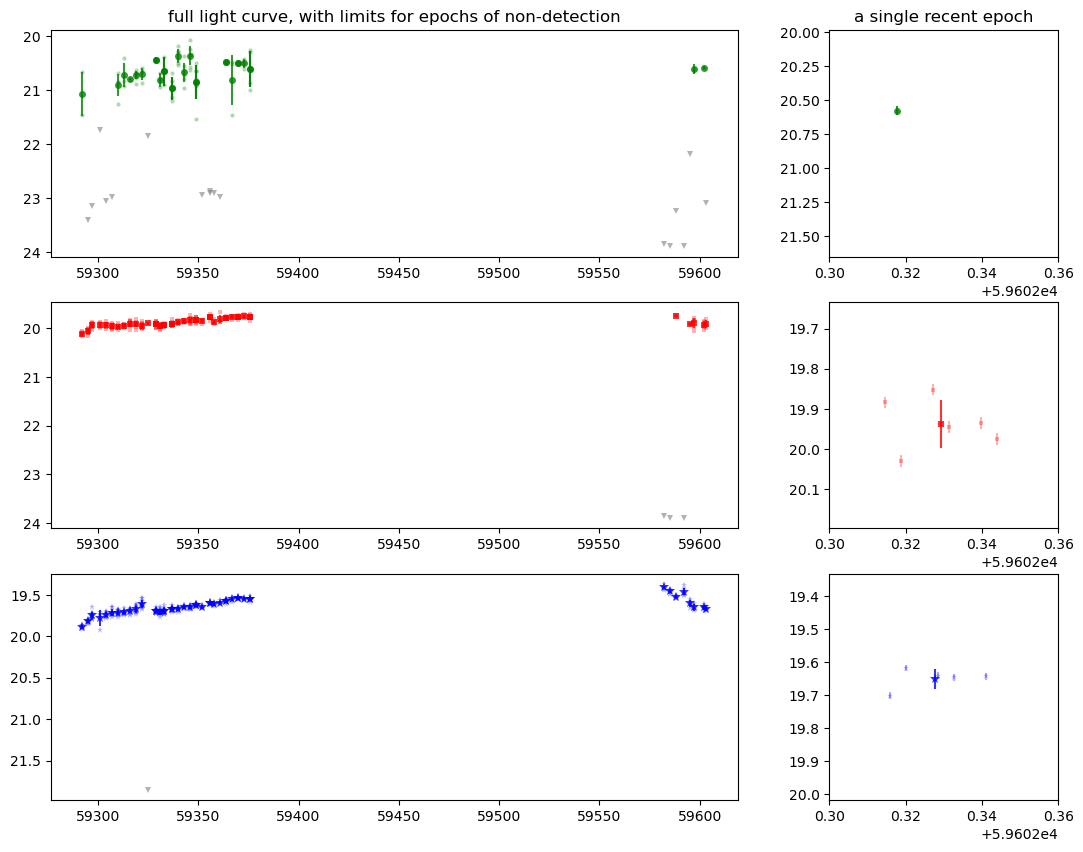

In [15]:
fig, ax = plt.subplots( 3, 2, figsize=(13,10), sharex=False, sharey=False, 
                       gridspec_kw={'width_ratios': [3, 1]} )

### at left, plot the full light curve
for f,filt in enumerate(all_filters):
    ### plot individual objects
    fx = np.where( obj_filter[ox] == filt )[0]
    ax[f,0].plot( obj_mjd[ox[fx]], obj_mag[ox[fx]], 
                  all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.3, mew=0, color=all_fcolors[f] )
    del fx
    ### plot the nightly-epoch combined photometry with error bar
    fx = np.where( candLC_filter[cx] == filt )[0]
    ax[f,0].errorbar( candLC_mjd[cx[fx]], candLC_mag[cx[fx]], yerr=candLC_mage[cx[fx]], 
                      fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f] )
    ### plot limiting magnitudes where there are non-detections
    lx = np.where( np.isnan(candLC_mag[cx[fx]]) == 1 )[0]
    ax[f,0].plot( candLC_mjd[cx[fx[lx]]], candLC_maglim[cx[fx[lx]]], 
                  'v', ms=5, alpha=0.6, mew=0, color='grey' )
    ### flip the y-axis
    ax[f,0].invert_yaxis()
    ### cut out non-detections from previous year
    # ax[f,0].set_xlim([59465,59550])

### title
ax[0,0].set_title('full light curve, with limits for epochs of non-detection')

### at right, zoom in on one epoch
for f,filt in enumerate(all_filters):
    ### plot individual objects
    fx = np.where( obj_filter[ox] == filt )[0]
    ax[f,1].errorbar( obj_mjd[ox[fx]], obj_mag[ox[fx]], yerr=obj_mage[ox[fx]], 
                      fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.3, mew=0, color=all_fcolors[f] )
    del fx
    ### plot the nightly-epoch combined photometry with error bar
    fx = np.where( candLC_filter[cx] == filt )[0]
    ax[f,1].errorbar( candLC_mjd[cx[fx]], candLC_mag[cx[fx]], yerr=candLC_mage[cx[fx]], 
                      fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f] )
    ### flip the y-axis
    ax[f,1].invert_yaxis()
    ### zoom in
    ax[f,1].set_xlim([59602.3,59602.36])

### title
ax[0,1].set_title('a single recent epoch')

### customize zoom-in y-axis limits
# ax[0,1].set_ylim([21.5,21.0])
# ax[1,1].set_ylim([21.4,21.1])
# ax[2,1].set_ylim([21.6,21.3])

plt.show()

### 2.1. Demo how to obtain the image triplets for DC21bae

In case it is ever needed. 

Go to https://decat-webap.lbl.gov/decatview.py/

Under "Candidate Lookup" enter DC21bae. Can take a while to generate the page of triplets.

Or, go straight to https://decat-webap.lbl.gov/decatview.py/cand/DC21bae?rbtype=undefined

<br>

## 3. Explore the DDF Data for AGN-matched candidates

### 3.1. Lightcurve summary parameters for the AGN-matched candidates

Investigate whether the matched AGN occupy a certain part of variability parameter space.

#### read in our match data

In [17]:
cosmos_filename = './all_agn_matches/COSMOS_matches.txt'
cosmos_agn_id = np.loadtxt(cosmos_filename, dtype='str', delimiter=',', usecols={0})
cosmos_agn_type = np.loadtxt(cosmos_filename, dtype='str', delimiter=',', usecols={3})
cosmos_cand_id = np.loadtxt(cosmos_filename, dtype='str', delimiter=',', usecols={4})

elais_filename = './all_agn_matches/ELAIS_matches.txt'
elais_agn_id = np.loadtxt(elais_filename, dtype='str', delimiter=',', usecols={0})
elais_agn_type = np.loadtxt(elais_filename, dtype='str', delimiter=',', usecols={3})
elais_cand_id = np.loadtxt(elais_filename, dtype='str', delimiter=',', usecols={4})

#### plot the number of objects vs. mean r/b score

Recall that "number of objects" is the number of difference-image detections.

Store the `cobj` and `meanrb` for all matched AGN in temporary arrays to use in the distribution plotting below.

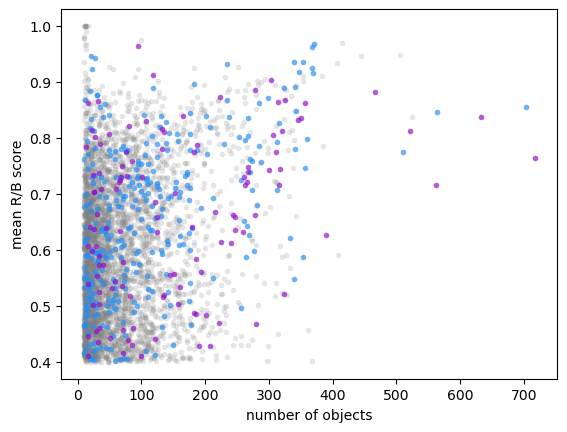

In [18]:
plt.plot(cand_cobj, cand_meanrb, 'o', ms=4, color='grey', mew=0, alpha=0.2)

temp_agn_cobj = []
temp_agn_meanrb = []
for cci in cosmos_cand_id:
    tx = np.where(cci.strip() == cand_id)[0]
    plt.plot(cand_cobj[tx], cand_meanrb[tx], 'o', ms=4, color='dodgerblue', mew=0, alpha=0.6)
    temp_agn_cobj.append(cand_cobj[tx])
    temp_agn_meanrb.append(cand_meanrb[tx])
    del tx
for eci in elais_cand_id:
    tx = np.where(eci.strip() == cand_id)[0]
    plt.plot(cand_cobj[tx], cand_meanrb[tx], 'o', ms=4, color='darkviolet', mew=0, alpha=0.6)
    temp_agn_cobj.append(cand_cobj[tx])
    temp_agn_meanrb.append(cand_meanrb[tx])
    del tx

plt.xlabel('number of objects')
plt.ylabel('mean R/B score')
plt.show()

#### plot the lightcurve duration vs. amplitude

Recall that the 'duration' is the time between the first and last detection in a difference-image.
And that 'amplitude' is the difference between the brightest and faintest difference-image magnitude.

Store the `tspan` and `amp` for all matched AGN in temporary arrays to use in the distribution plotting below.

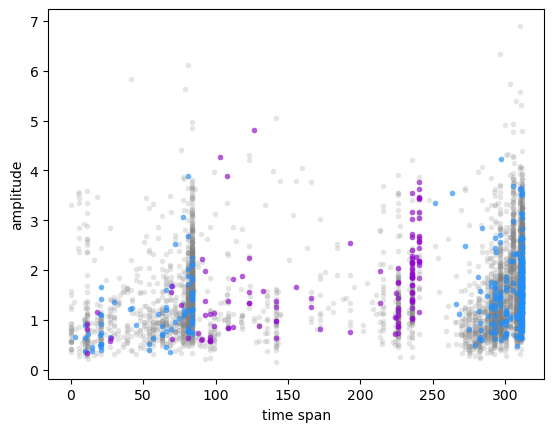

In [19]:
plt.plot(cand_tspan, cand_amp, 'o', ms=4, color='grey', mew=0, alpha=0.2)

temp_agn_tspan = []
temp_agn_amp = []
for cci in cosmos_cand_id:
    tx = np.where(cci.strip() == cand_id)[0]
    plt.plot(cand_tspan[tx], cand_amp[tx], 'o', ms=4, color='dodgerblue', mew=0, alpha=0.6)
    temp_agn_tspan.append(cand_tspan[tx])
    temp_agn_amp.append(cand_amp[tx])
    del tx
for eci in elais_cand_id:
    tx = np.where(eci.strip() == cand_id)[0]
    plt.plot(cand_tspan[tx], cand_amp[tx], 'o', ms=4, color='darkviolet', mew=0, alpha=0.6)
    temp_agn_tspan.append(cand_tspan[tx])
    temp_agn_amp.append(cand_amp[tx])
    del tx

plt.xlabel('time span')
plt.ylabel('amplitude')
plt.show()

#### plot distributions to see how AGN-matched candidates differ from all candidates

In [20]:
temp_agn_cobj   = np.asarray(temp_agn_cobj, dtype='float')
temp_agn_meanrb = np.asarray(temp_agn_meanrb, dtype='float')
temp_agn_tspan  = np.asarray(temp_agn_tspan, dtype='float')
temp_agn_amp    = np.asarray(temp_agn_amp, dtype='float')

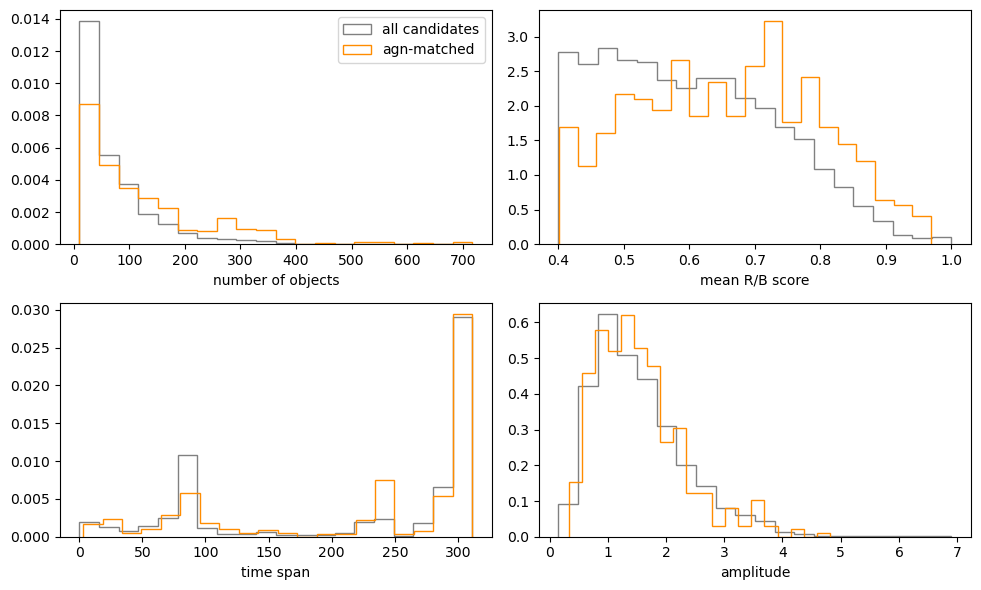

In [21]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 6)

ax[0,0].hist(cand_cobj, bins=20, density=True, histtype='step', color='grey', label='all candidates')
ax[0,0].hist(temp_agn_cobj, bins=20, density=True, histtype='step', color='darkorange', label='agn-matched')
ax[0,0].set_xlabel('number of objects')
ax[0,0].legend(loc='upper right')

ax[0,1].hist(cand_meanrb, bins=20, density=True, histtype='step', color='grey')
ax[0,1].hist(temp_agn_meanrb, bins=20, density=True, histtype='step', color='darkorange')
ax[0,1].set_xlabel('mean R/B score')

ax[1,0].hist(cand_tspan, bins=20, density=True, histtype='step', color='grey')
ax[1,0].hist(temp_agn_tspan, bins=20, density=True, histtype='step', color='darkorange')
ax[1,0].set_xlabel('time span')

ax[1,1].hist(cand_amp, bins=20, density=True, histtype='step', color='grey')
ax[1,1].hist(temp_agn_amp, bins=20, density=True, histtype='step', color='darkorange')
ax[1,1].set_xlabel('amplitude')

fig.tight_layout()
fig.show()

**Number of objects:** The AGN-matched candidates generally have more detections than all candidates. This is expected, because AGN are long-duration variables (unlike supernovae, most of which "last" for ~100 days or so).

**Mean R/B score:** The AGN-matched candidates generally have a higher R/B score. This is to be expected because nothing that matched to an AGN is bogus, they're all real.

**Time span:** The difference is less pronounced than for the other parameters, but the AGN-matched candidates do have longer time spans. This is as expected for the same reason why they have more objects (more difference-image detections).

**Amplitude:** The distribution for AGN-matched candidates peaks at around 1.5 mag, brighter than for all candidates, yet there are fewer at the bright end. This is as expected, as the bright tail of this distribution is likely bright flaring variable stars.

### 3.2. create new lightcurve summary parameter for variability

**RMS About the Mean**

> **NOTE:** Here we are using the nightly-epoch (combined) lightcurves, not the lightcurves that include every detection of every image (i.e., intra-night images). This is DIFFERENT from Section 2.1.

The new lightcurve summary parameter will be the root of the mean of the squares (RMS) of the variation in the nightly-epoch difference-image magnitude about the mean.

A lightcurve with little variability would have a low RMS. There are probably better parameters to use but this is a simple one to start with.

First, define new arrays to hold the new lightcurve variability parameters.

In [22]:
paramLC_rms   = np.zeros(len(paramLC_candid), dtype='float')
paramLC_rms_g = np.zeros(len(paramLC_candid), dtype='float')
paramLC_rms_r = np.zeros(len(paramLC_candid), dtype='float')
paramLC_rms_i = np.zeros(len(paramLC_candid), dtype='float')

Note that we have to use `nanmean` because there are `nan` in the data.

The following cell will generate a RuntimeWarning about taking the mean of an empty slice but that's ok.

In [23]:
%%time
for c, candid in enumerate(paramLC_candid):

    gx = np.where((candLC_candid == candid) & (candLC_filter == 'g'))[0]
    rx = np.where((candLC_candid == candid) & (candLC_filter == 'r'))[0]
    ix = np.where((candLC_candid == candid) & (candLC_filter == 'i'))[0]
    
    gvals = (candLC_mag[gx] - np.nanmean(candLC_mag[gx]))**2
    rvals = (candLC_mag[rx] - np.nanmean(candLC_mag[rx]))**2
    ivals = (candLC_mag[ix] - np.nanmean(candLC_mag[ix]))**2
        
    paramLC_rms_g[c] = np.sqrt(np.nanmean(gvals))
    paramLC_rms_r[c] = np.sqrt(np.nanmean(rvals))
    paramLC_rms_i[c] = np.sqrt(np.nanmean(ivals))
    
    vals = np.concatenate((gvals, rvals, ivals))
    paramLC_rms[c] = np.sqrt(np.nanmean(vals))
    
    del gx, rx, ix
    del gvals, rvals, ivals, vals

<timed exec>:9: RuntimeWarning: Mean of empty slice
<timed exec>:13: RuntimeWarning: Mean of empty slice
<timed exec>:7: RuntimeWarning: Mean of empty slice
<timed exec>:11: RuntimeWarning: Mean of empty slice
<timed exec>:8: RuntimeWarning: Mean of empty slice
<timed exec>:12: RuntimeWarning: Mean of empty slice


CPU times: user 1min 10s, sys: 2.89 ms, total: 1min 10s
Wall time: 1min 10s


#### plot new RMS parameter vs. other lightcurve parameters

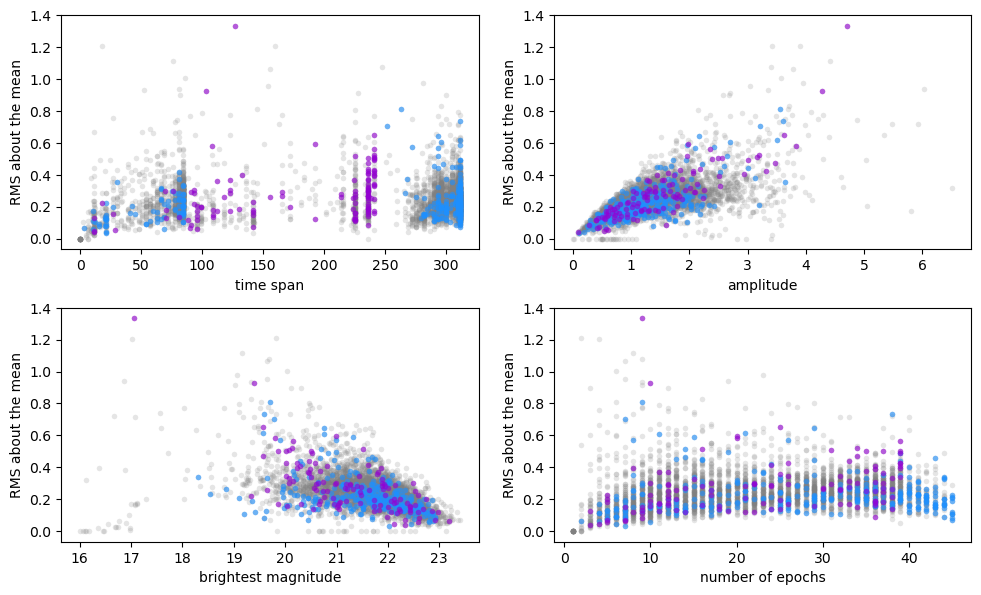

In [24]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(10, 6)

ax[0,0].plot(paramLC_tspan, paramLC_rms, 'o', ms=4, color='grey', mew=0, alpha=0.2)
ax[1,0].plot(paramLC_minmag, paramLC_rms, 'o', ms=4, color='grey', mew=0, alpha=0.2)
ax[0,1].plot(paramLC_amp, paramLC_rms, 'o', ms=4, color='grey', mew=0, alpha=0.2)
ax[1,1].plot(paramLC_neps, paramLC_rms, 'o', ms=4, color='grey', mew=0, alpha=0.2)

temp_agn_rms = []
temp_agn_neps = []
temp_agn_minmag = []
temp_agn_pLCi = []
for cci in cosmos_cand_id:
    tx = np.where(cci.strip() == paramLC_candid)[0]
    ax[0,0].plot(paramLC_tspan[tx], paramLC_rms[tx], 'o', ms=4, color='dodgerblue', mew=0, alpha=0.6)
    ax[1,0].plot(paramLC_minmag[tx], paramLC_rms[tx], 'o', ms=4, color='dodgerblue', mew=0, alpha=0.6)
    ax[0,1].plot(paramLC_amp[tx], paramLC_rms[tx], 'o', ms=4, color='dodgerblue', mew=0, alpha=0.6)
    ax[1,1].plot(paramLC_neps[tx], paramLC_rms[tx], 'o', ms=4, color='dodgerblue', mew=0, alpha=0.6)
    temp_agn_rms.append(paramLC_rms[tx[0]])
    temp_agn_neps.append(paramLC_neps[tx[0]])
    temp_agn_minmag.append(paramLC_minmag[tx[0]])
    temp_agn_pLCi.append(int(tx[0]))
    del tx
for eci in elais_cand_id:
    tx = np.where(eci.strip() == paramLC_candid)[0]
    ax[0,0].plot(paramLC_tspan[tx], paramLC_rms[tx], 'o', ms=4, color='darkviolet', mew=0, alpha=0.6)
    ax[1,0].plot(paramLC_minmag[tx], paramLC_rms[tx], 'o', ms=4, color='darkviolet', mew=0, alpha=0.6)
    ax[0,1].plot(paramLC_amp[tx], paramLC_rms[tx], 'o', ms=4, color='darkviolet', mew=0, alpha=0.6)
    ax[1,1].plot(paramLC_neps[tx], paramLC_rms[tx], 'o', ms=4, color='darkviolet', mew=0, alpha=0.6)
    temp_agn_rms.append(paramLC_rms[tx[0]])
    temp_agn_neps.append(paramLC_neps[tx[0]])
    temp_agn_minmag.append(paramLC_minmag[tx[0]])
    temp_agn_pLCi.append(int(tx[0]))
    del tx

ax[0,0].set_xlabel('time span')
ax[1,0].set_xlabel('brightest magnitude')
ax[0,1].set_xlabel('amplitude')
ax[1,1].set_xlabel('number of epochs')

ax[0,0].set_ylabel('RMS about the mean')
ax[1,0].set_ylabel('RMS about the mean')
ax[0,1].set_ylabel('RMS about the mean')
ax[1,1].set_ylabel('RMS about the mean')

fig.tight_layout()
fig.show()

#### what are the top thirty most variable candidates associated with AGN?

In [25]:
temp_agn_rms = np.asarray(temp_agn_rms, dtype='float')
temp_agn_neps = np.asarray(temp_agn_neps, dtype='int')
temp_agn_pLCi = np.asarray(temp_agn_pLCi, dtype='int')

In [26]:
sx = np.flip(np.argsort(temp_agn_rms))

for i in range(30):
    ci = temp_agn_pLCi[sx[i]]
    print('%10s %5.3f' % (paramLC_candid[ci], paramLC_rms[ci]))

  DC21kkth 1.334
 DC21cxiih 0.928
  DC21iago 0.810
  DC21bckq 0.736
  DC21jprl 0.702
  DC21kocw 0.652
  DC21dolk 0.644
  DC21fviw 0.615
   DC21ypd 0.606
  DC21kluc 0.595
   DC21pxp 0.588
 DC21cwvox 0.582
  DC21gwql 0.572
  DC21edww 0.570
  DC21ktwc 0.564
  DC21kqfq 0.522
  DC21klfx 0.517
  DC21hyaw 0.516
  DC21kqwp 0.509
  DC21kokx 0.504
  DC21lqtw 0.502
  DC21ktsz 0.499
   DC21scw 0.494
   DC21fyl 0.492
  DC21kofv 0.492
  DC21knqb 0.472
  DC21bfzm 0.465
  DC21blkp 0.457
  DC21eiar 0.453
 DC21bwcrp 0.450


## 4. Plot lightcurves for 30 "most variable" AGN-matched DDF candidates

Just use the nightly-epoch photometry here.

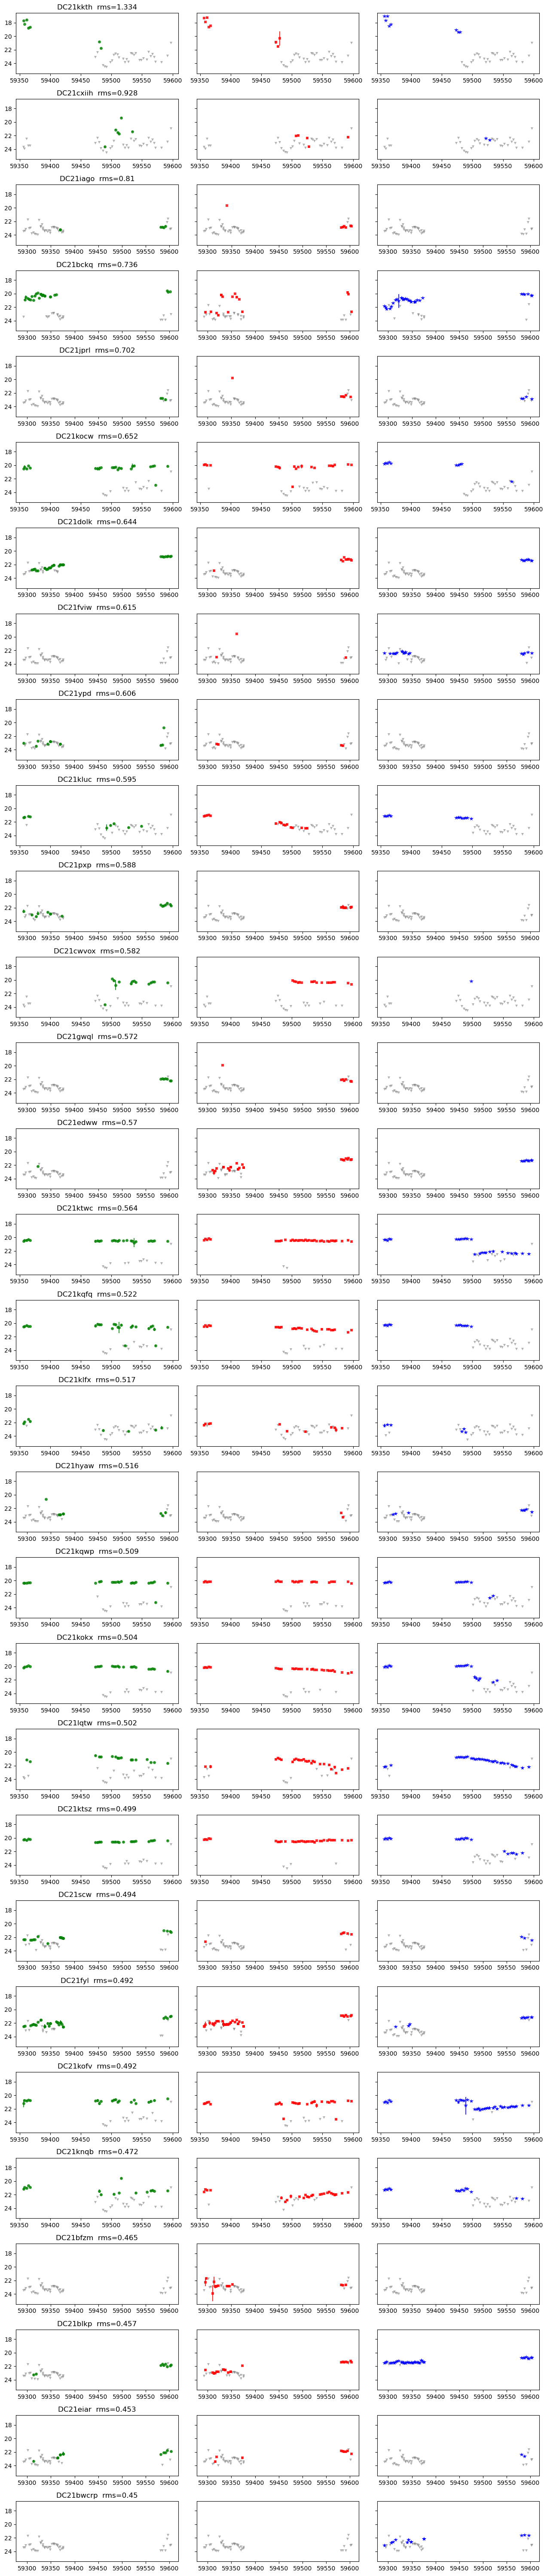

In [27]:
fig, ax = plt.subplots(30, 3, figsize=(13,60), sharex=False, sharey=True)
for i in range(30):
    ci = temp_agn_pLCi[sx[i]]
    candid = paramLC_candid[ci]
    candrms = paramLC_rms[ci]
    title = candid + '  rms=' + str(np.round(candrms,3))
    for f,filt in enumerate(all_filters):
        x = np.where((candLC_candid == candid) & (candLC_filter == filt))[0]
        ax[i,f].errorbar(candLC_mjd[x], candLC_mag[x], yerr=candLC_mage[x],
                     fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])
        lx = np.where(np.isnan(candLC_mag[x]) == 1)[0]
        ax[i,f].plot(candLC_mjd[x[lx]], candLC_maglim[x[lx]], 
                  'v', ms=5, alpha=0.6, mew=0, color='grey' )
        del x, lx
        ax[i,0].set_title(title)
ax[0,0].invert_yaxis()
fig.tight_layout()
fig.show()

## 5. Plot lightcurves for 30 AGN-matched DDF candidates with the most detections

Just use the nightly-epoch photometry here.

In [28]:
sx = np.flip(np.argsort(temp_agn_neps))

for i in range(30):
    ci = temp_agn_pLCi[sx[i]]
    print('%10s %5.3f' % (paramLC_candid[ci], paramLC_neps[ci]))

   DC21bae 45.000
   DC21bhq 45.000
   DC21jmx 45.000
    DC21fg 45.000
   DC21fco 45.000
   DC21dfa 45.000
    DC21by 45.000
   DC21mtc 45.000
    DC21mk 45.000
   DC21cpt 44.000
    DC21ig 44.000
   DC21klq 44.000
   DC21pul 44.000
   DC21dxm 44.000
   DC21kle 44.000
   DC21esh 44.000
  DC21evix 44.000
    DC21bg 44.000
   DC21fhu 44.000
   DC21gha 44.000
   DC21rvk 43.000
  DC21blkp 43.000
   DC21gux 43.000
   DC21ftm 43.000
   DC21ber 43.000
   DC21gin 43.000
 DC21bvzre 43.000
    DC21lx 43.000
   DC21ttx 43.000
   DC21dyx 43.000


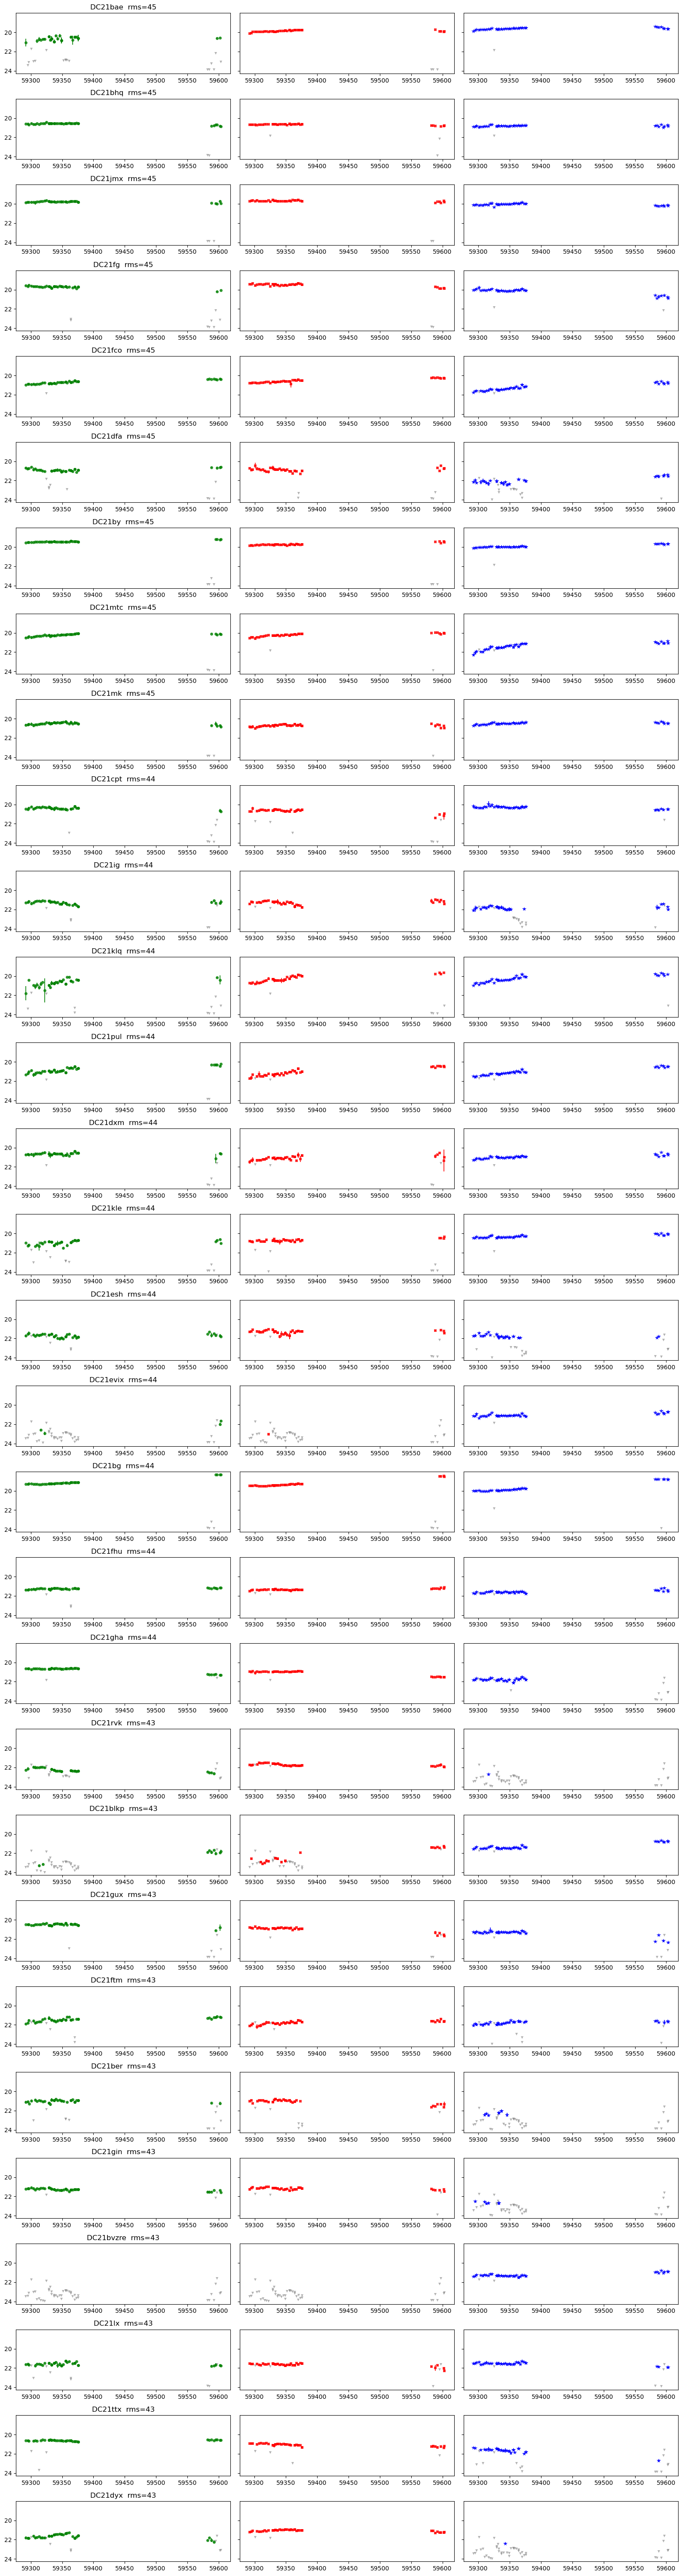

In [29]:
fig, ax = plt.subplots(30, 3, figsize=(16,60), sharex=False, sharey=True)

for i in range(30):
    ci = temp_agn_pLCi[sx[i]]
    candid = paramLC_candid[ci]
    candneps = paramLC_neps[ci]
    title = candid + '  rms=' + str(np.round(candneps,3))
    for f,filt in enumerate(all_filters):
        x = np.where((candLC_candid == candid) & (candLC_filter == filt))[0]
        ax[i,f].errorbar(candLC_mjd[x], candLC_mag[x], yerr=candLC_mage[x],
                     fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])
        lx = np.where(np.isnan(candLC_mag[x]) == 1)[0]
        ax[i,f].plot(candLC_mjd[x[lx]], candLC_maglim[x[lx]], 
                  'v', ms=5, alpha=0.6, mew=0, color='grey' )
        del x, lx
    ax[i,0].set_title(title)

ax[0,0].invert_yaxis()
fig.tight_layout()
fig.show()

## 6. Plot lightcurves for 30 AGN-matched DDF candidates with the brightest difference-image magnitudes.

Just use the nightly-epoch photometry here.

In [30]:
sx = (np.argsort(temp_agn_minmag))

for i in range(30):
    ci = temp_agn_pLCi[sx[i]]
    print('%10s %5.3f' % (paramLC_candid[ci], paramLC_minmag[ci]))

  DC21kkth 17.062
    DC21bg 18.302
   DC21fyx 18.542
   DC21rcr 18.839
   DC21gkz 19.107
    DC21by 19.190
 DC21dbtwg 19.340
    DC21fg 19.346
 DC21cxiih 19.383
   DC21bae 19.412
  DC21fviw 19.571
  DC21kocw 19.574
  DC21knqb 19.575
   DC21jmx 19.577
  DC21bckq 19.582
   DC21uil 19.622
  DC21kkqh 19.639
   DC21klq 19.640
  DC21iago 19.697
  DC21jprl 19.776
 DC21cwvox 19.805
  DC21kkuo 19.862
  DC21kokx 19.865
  DC21gwql 19.907
  DC21bglq 19.934
   DC21mtc 19.957
   DC21gxd 19.961
   DC21wmq 19.962
   DC21cpt 19.983
  DC21koqo 20.005


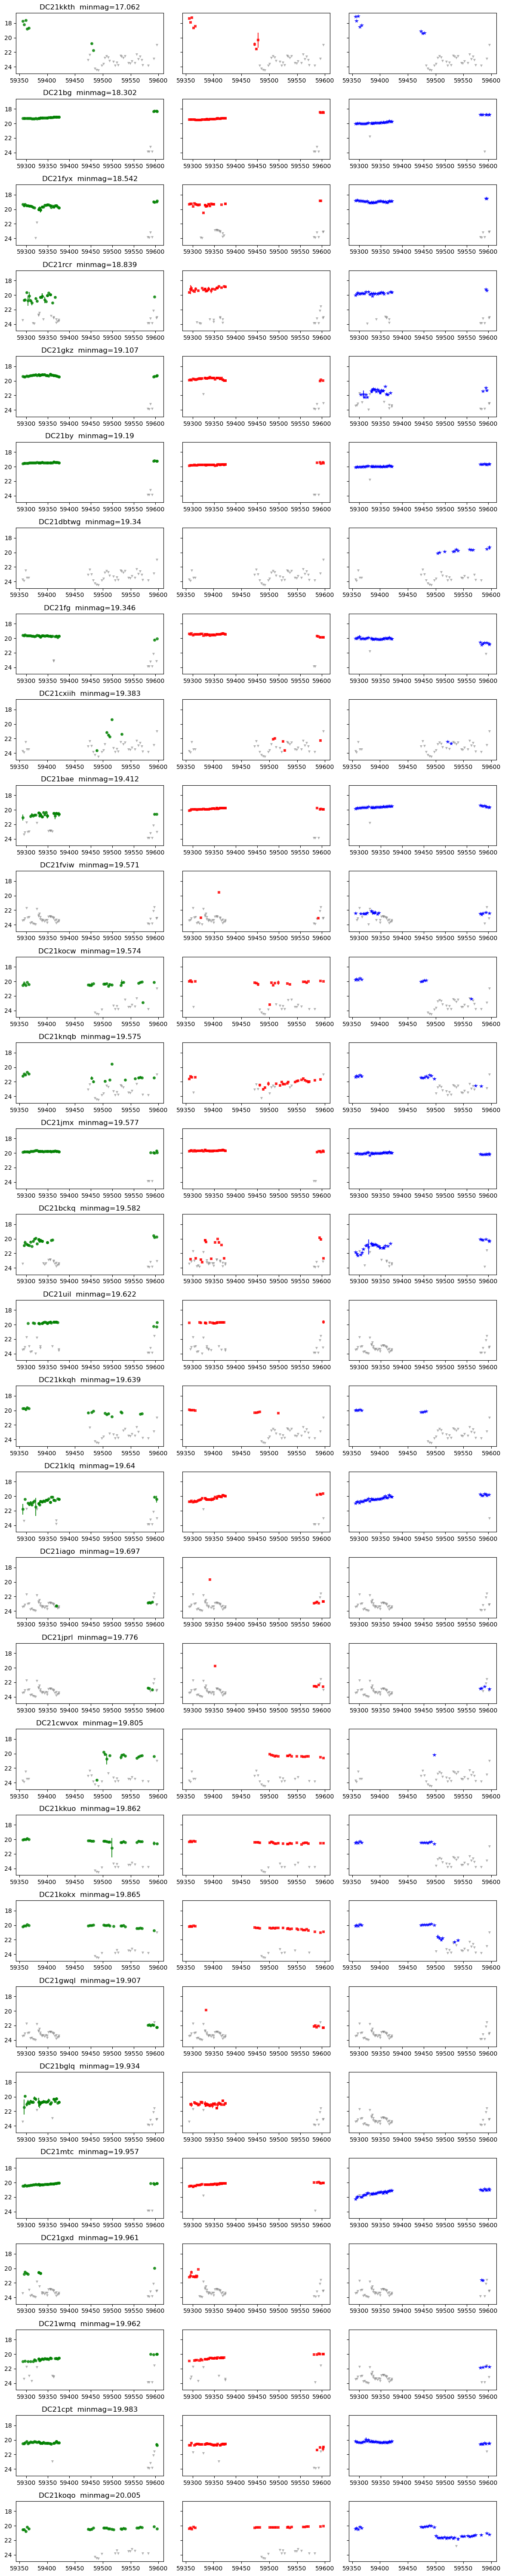

In [31]:
fig, ax = plt.subplots(30, 3, figsize=(12,60), sharex=False, sharey=True)

for i in range(30):
    ci = temp_agn_pLCi[sx[i]]
    candid = paramLC_candid[ci]
    candminmag = paramLC_minmag[ci]
    title = candid + '  minmag=' + str(np.round(candminmag,3))
    for f,filt in enumerate(all_filters):
        x = np.where((candLC_candid == candid) & (candLC_filter == filt))[0]
        ax[i,f].errorbar(candLC_mjd[x], candLC_mag[x], yerr=candLC_mage[x],
                     fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])
        lx = np.where(np.isnan(candLC_mag[x]) == 1)[0]
        ax[i,f].plot(candLC_mjd[x[lx]], candLC_maglim[x[lx]], 
                  'v', ms=5, alpha=0.6, mew=0, color='grey' )
        del x, lx
    ax[i,0].set_title(title)

ax[0,0].invert_yaxis()
fig.tight_layout()
fig.show()

## 7. Look for "real-looking" intra-night variations for the most interesting AGN

Among the top 30 highest RMS(variability), detections, and magnitudes, I further explore the most "interesting" looking lightcurves:

> **DC21kkth**: Disappears completely after 2021A observing semester(no detections during 2021B semester).
>
> - Top 30 highest RMS & magnitude

> **DC21bckq**: Shows a good bit of variability
>
> - Top 30 highest RMS & magnitude

> **DC21kofv**: Abrupt decrease in the i-band difference-image magnitude at around a MJD of 59500
>
> - Top 30 highest RMS 

> **DC21esh**: Noticable variability
>
> - Top 30 highest detections

> **DC21kle**: Noticable variability
>
> - Top 30 highest detections and magnitudes

> **DC21bae**: Noticable variability in g-band
>
> - Top 30 highest detections and magnitudes

> **DC21rcr**: Noticable variability
>
> - Top 30 highest magnitudes

In [33]:
%matplotlib widget

### DC21kkth

In [34]:
# "Separating" data in each filter in the y-axis so points don't overlap
all_offset  = [-1.0, 0.0, 1.0]

# Offset in strings to easily be added to legends
all_soffset = [' -1','',' +1']

In [35]:
use_candid = 'DC21kkth'

ox = np.where(obj_candid == use_candid)[0]
cx = np.where(candLC_candid == use_candid)[0]

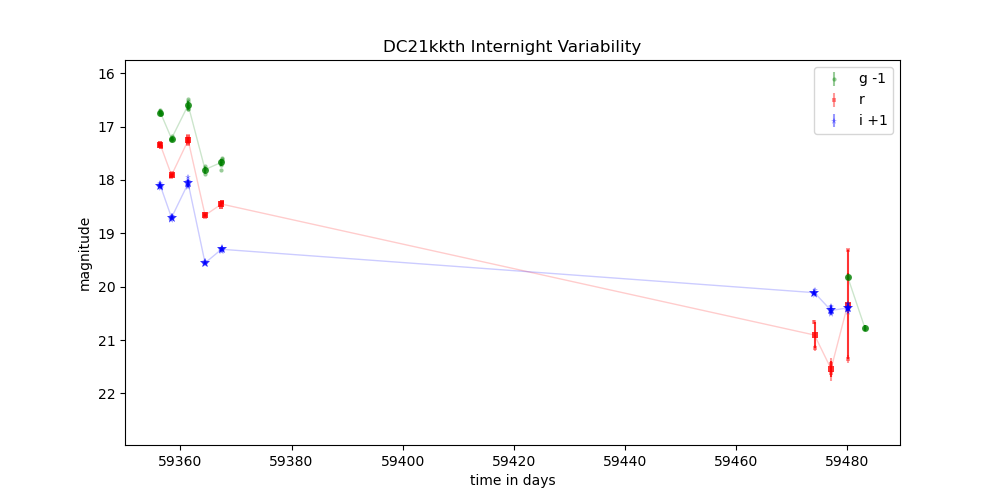

In [36]:
fig = plt.figure(figsize=(10,5))

### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2
    
for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    # plt.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
    #              fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    plt.errorbar(obj_mjd[ox[fx]], obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    # plt.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
    #          ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    plt.plot(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    # plt.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
    #              fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])
    plt.errorbar(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

plt.ylim([y2, y1])
del y1, y2

# plt.xlabel('time in minutes')
plt.xlabel('time in days')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(use_candid+' '+'Internight Variability')

plt.show()

AttributeError: 'GrouperView' object has no attribute 'join'

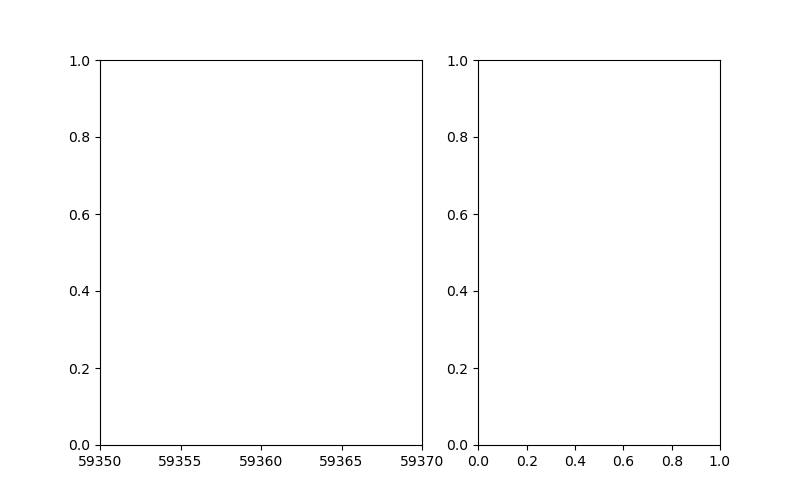

In [37]:
fig = plt.figure(figsize=(8,5))


bax = brokenaxes(
    xlims=((59350, 59370), (59470, 59485)),
    hspace=100
)



### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    bax.errorbar(obj_mjd[ox[fx]], obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    bax.plot(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    bax.errorbar(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

bax.set_ylim([y2, y1])
del y1, y2

bax.set_xlabel('Time in Days')
bax.set_ylabel('Difference-Image Magnitude')
bax.legend(loc='best')
bax.set_title(use_candid+' '+'Internight Variability');

#bax.show()

### DC21bckq

In [38]:
# Offset
all_offset  = [-1.0, 0.0, 1.0]
all_soffset = [' -1','',' +1']

In [39]:
use_candid = 'DC21bckq'

ox = np.where(obj_candid == use_candid)[0]
cx = np.where(candLC_candid == use_candid)[0]

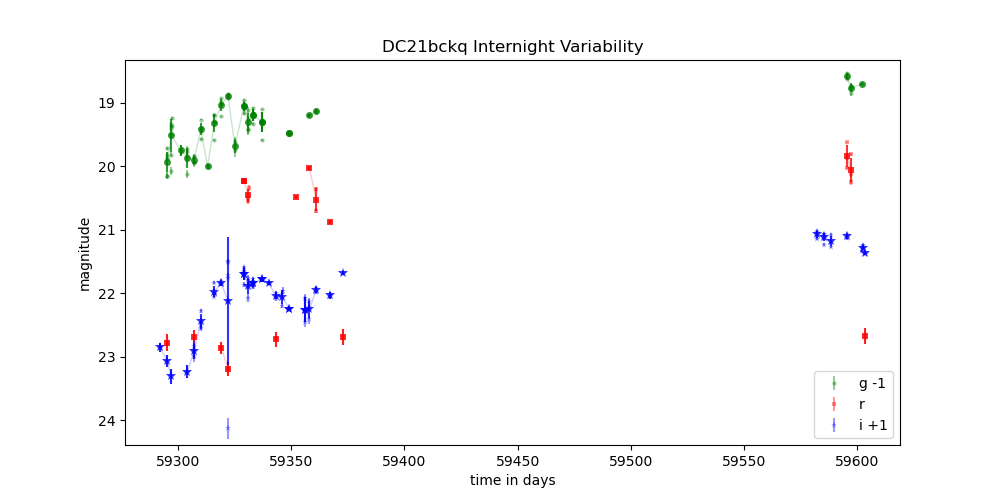

In [40]:
fig = plt.figure(figsize=(10,5))

### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    # plt.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
    #              fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    plt.errorbar(obj_mjd[ox[fx]], obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    # plt.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
    #          ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    plt.plot(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    # plt.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
    #              fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])
    plt.errorbar(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

plt.ylim([y2, y1])
del y1, y2

# plt.xlabel('time in minutes')
plt.xlabel('time in days')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(use_candid+' '+'Internight Variability')

plt.show()

AttributeError: 'GrouperView' object has no attribute 'join'

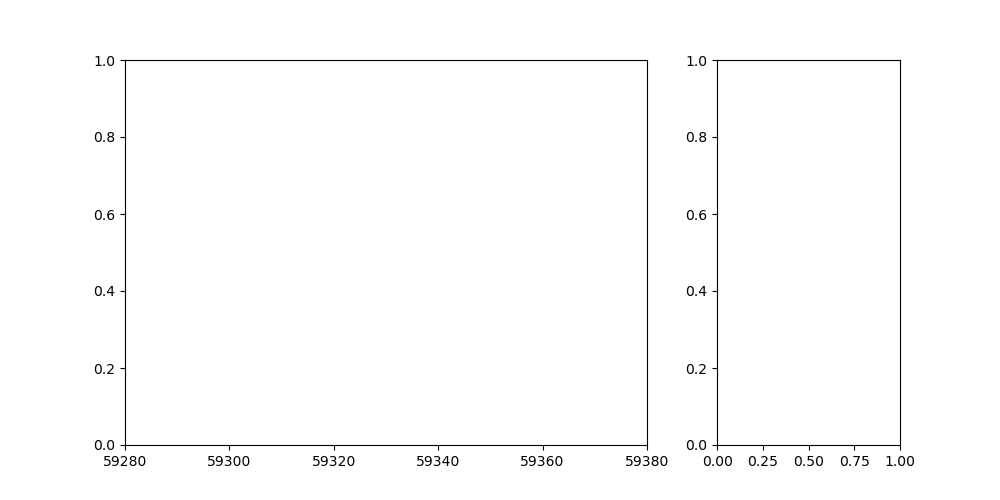

In [41]:
fig = plt.figure(figsize=(10,5))


bax = brokenaxes(
    xlims=((59280, 59380), (59575, 59610)),
)



### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    bax.errorbar(obj_mjd[ox[fx]], obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    bax.plot(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    bax.errorbar(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

bax.set_ylim([y2, y1])
del y1, y2

bax.set_xlabel('Time in Days')
bax.set_ylabel('Difference-Image Magnitude')
bax.legend(loc='best')
bax.set_title(use_candid+' '+'Internight Variability');

#bax.show()

### DC21kofv

In [42]:
# Offset
all_offset  = [-1.0, 0.0, 1.0]
all_soffset = [' -1','',' +1']

In [43]:
use_candid = 'DC21kofv'

ox = np.where(obj_candid == use_candid)[0]
cx = np.where(candLC_candid == use_candid)[0]

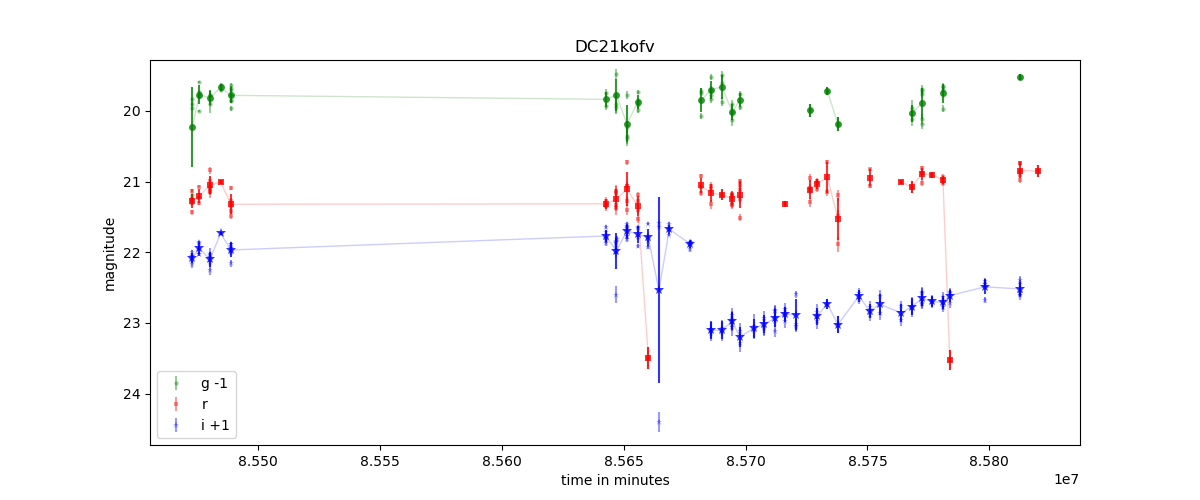

In [44]:
fig = plt.figure(figsize=(12,5))

### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    plt.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    plt.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    plt.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

plt.ylim([y2, y1])
del y1, y2

plt.xlabel('time in minutes')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(use_candid)

plt.show()

### DC21esh

In [45]:
# Offset
all_offset  = [-1.0, 0.0, 1.0]
all_soffset = [' -1','',' +1']

In [46]:
use_candid = 'DC21esh'

ox = np.where(obj_candid == use_candid)[0]
cx = np.where(candLC_candid == use_candid)[0]

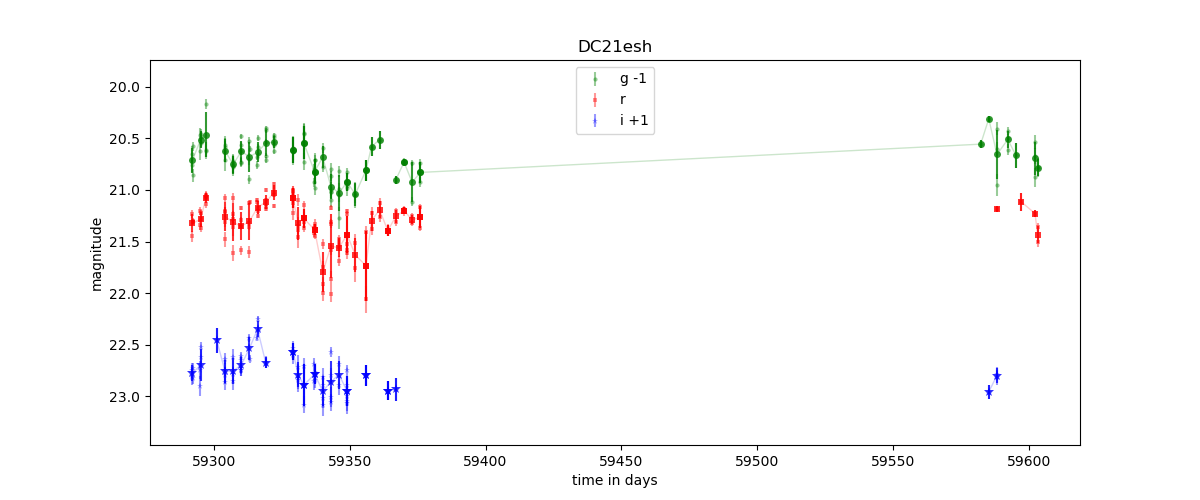

In [47]:
fig = plt.figure(figsize=(12,5))

### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2
    
for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    # plt.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
    #              fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    plt.errorbar(obj_mjd[ox[fx]], obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    # plt.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
    #          ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    plt.plot(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    # plt.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
    #              fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])
    plt.errorbar(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

plt.ylim([y2, y1])
del y1, y2

# plt.xlabel('time in minutes')
plt.xlabel('time in days')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(use_candid)

plt.show()

### DC21kle

In [48]:
# Offset
all_offset  = [-1.0, 0.0, 1.0]
all_soffset = [' -1','',' +1']

In [49]:
use_candid = 'DC21kle'

ox = np.where(obj_candid == use_candid)[0]
cx = np.where(candLC_candid == use_candid)[0]

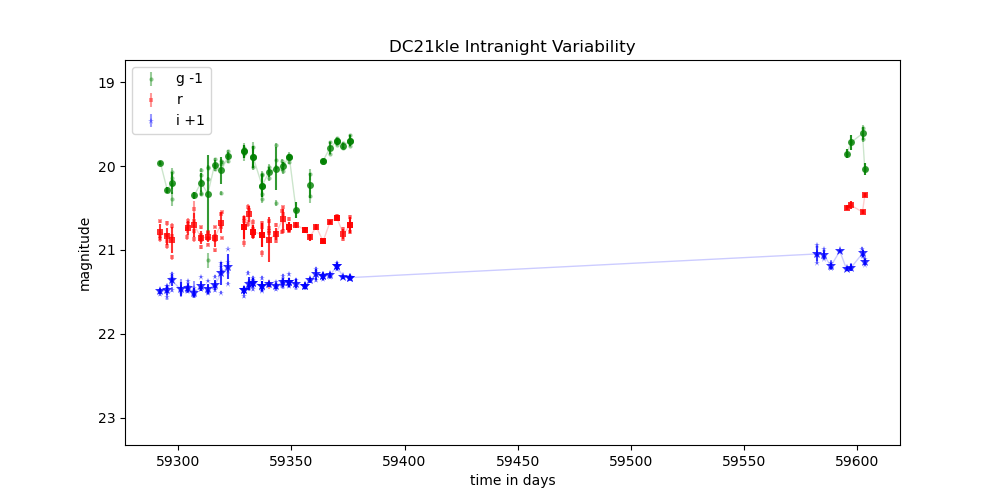

In [50]:
fig = plt.figure(figsize=(10,5))

### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    # plt.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
    #              fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    plt.errorbar(obj_mjd[ox[fx]], obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    # plt.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
    #          ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    plt.plot(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    # plt.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
    #              fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])
    plt.errorbar(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

plt.ylim([y2, y1])
del y1, y2

# plt.xlabel('time in minutes')
plt.xlabel('time in days')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(use_candid+' '+'Intranight Variability')

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,5))


bax = brokenaxes(
    xlims=((59280, 59380), (59575, 59610)),
)



### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    bax.errorbar(obj_mjd[ox[fx]], obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    bax.plot(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    bax.errorbar(candLC_mjd[cx[fx]], candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

bax.set_ylim([y2, y1])
del y1, y2

bax.set_xlabel('Time in Days')
bax.set_ylabel('Difference-Image Magnitude')
bax.legend(loc='best')
bax.set_title(use_candid+' '+'Internight Variability');

#bax.show()

### DC21bae

In [51]:
# Offset
all_offset  = [-1.5, 0.5, 1.5]
all_soffset = [' -1.5',' +0.5',' +1.5']

In [52]:
use_candid = 'DC21bae'

ox = np.where(obj_candid == use_candid)[0]
cx = np.where(candLC_candid == use_candid)[0]

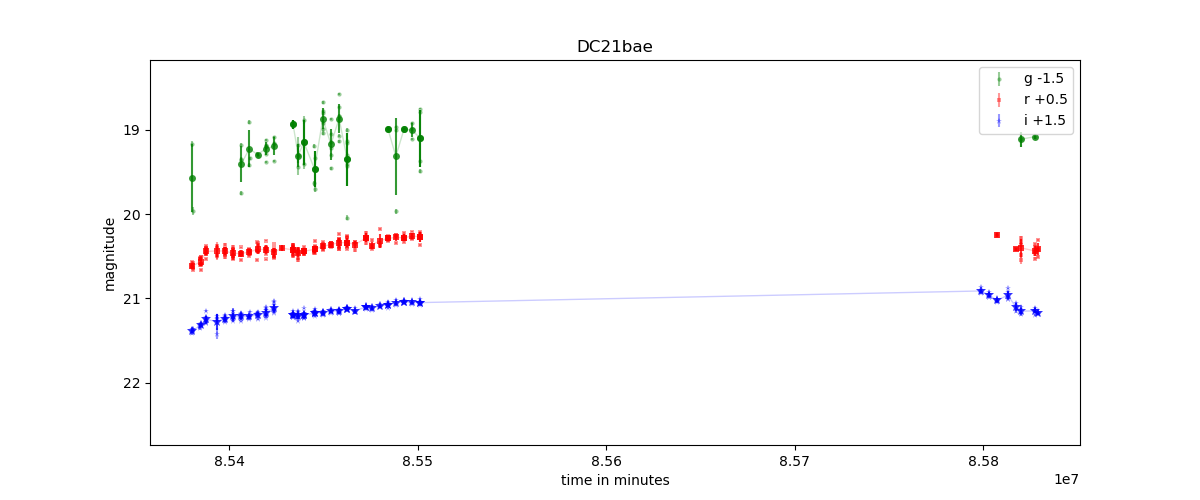

In [53]:
fig = plt.figure(figsize=(12,5))

### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    plt.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    plt.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    plt.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

plt.ylim([y2, y1])
del y1, y2

plt.xlabel('time in minutes')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(use_candid)

plt.show()

### DC21rcr

In [54]:
# Offset
all_offset  = [-2.0, 1.0, 1.5]
all_soffset = [' -2',' +1',' +1.5']

In [55]:
use_candid = 'DC21rcr'

ox = np.where(obj_candid == use_candid)[0]
cx = np.where(candLC_candid == use_candid)[0]

AttributeError: 'GrouperView' object has no attribute 'join'

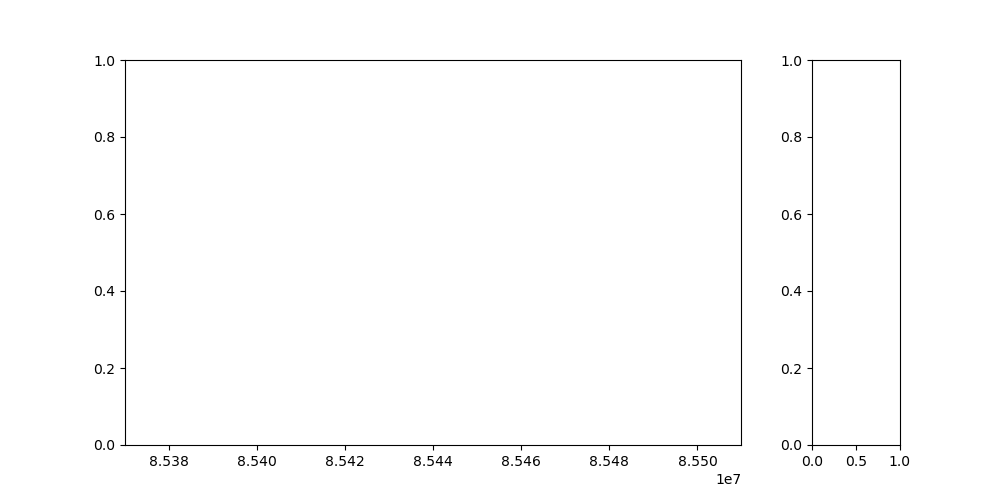

In [56]:
fig = plt.figure(figsize=(10,5))


bax = brokenaxes(
    xlims=((8.537*(10**7), 8.551*(10**7)), (8.581*(10**7), 8.583*(10**7))),
)



### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    bax.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    bax.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    bax.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

bax.set_ylim([y2, y1])
del y1, y2

bax.set_xlabel('Time in Minutes')
bax.set_ylabel('Difference-Image Magnitude')
bax.legend(loc='best')
bax.set_title(use_candid);

#bax.show()

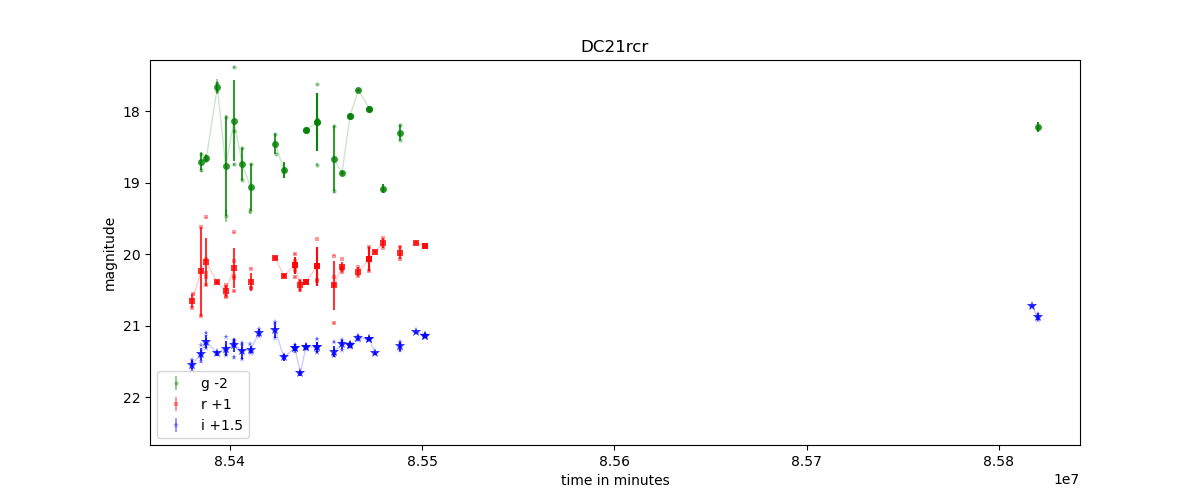

In [57]:
fig = plt.figure(figsize=(12,5))

### Define the y limits of the plot based on max/min magnitudes
y1 = np.min(obj_mag[ox]) - 1.2
y2 = np.max(obj_mag[ox]) + 1.2

for f,filt in enumerate(all_filters):
    
    ### intra-night photometry
    fx = np.where(obj_filter[ox] == filt)[0]
    plt.errorbar(obj_mjd[ox[fx]]*24.0*60.0, obj_mag[ox[fx]] + all_offset[f], yerr=obj_mage[ox[fx]], 
                 fmt=all_fshapes[f], ms=all_fsizes[f]-2, alpha=0.4, mew=0, color=all_fcolors[f], label=filt+all_soffset[f])
    del fx
    
    ### nightly-epoch photometry
    fx = np.where(candLC_filter[cx] == filt)[0]
    plt.plot(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f],
             ls='solid', alpha=0.2, lw=1, color=all_fcolors[f])
    plt.errorbar(candLC_mjd[cx[fx]]*24.0*60.0, candLC_mag[cx[fx]] + all_offset[f], yerr=candLC_mage[cx[fx]],
                 fmt=all_fshapes[f], ms=all_fsizes[f], alpha=0.8, mew=0, color=all_fcolors[f])

plt.ylim([y2, y1])
del y1, y2

plt.xlabel('time in minutes')
plt.ylabel('magnitude')
plt.legend(loc='best')
plt.title(use_candid);

plt.show()

AttributeError: 'GrouperView' object has no attribute 'join'

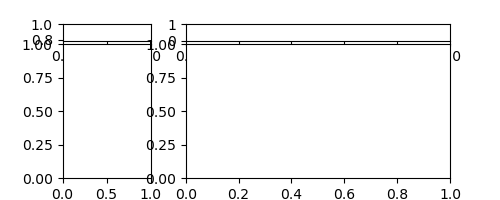

In [58]:
fig = plt.figure(figsize=(5,2))
bax = brokenaxes(
    xlims=((0, .1), (.4, .7)),
    ylims=((-1, .7), (.79, 1)),
    hspace=.05
)
x = np.linspace(0, 1, 100)
bax.plot(x, np.sin(10 * x), label='sin')
bax.plot(x, np.cos(10 * x), label='cos')
bax.legend(loc=3)
bax.set_xlabel('time')
bax.set_ylabel('value')

In [61]:
brokenaxes.brokenaxes

AttributeError: 'function' object has no attribute 'brokenaxes'

In [60]:
from brokenaxes import brokenaxes